# Building Custom Palettes in Matplotlib
[matplotlib.org/../colormap-manipulation](https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import numpy as np

def plot_cmap(cmap, ax=None):
    matrix = np.random.random((10,10))*2 - 1
    if ax is None:
        fig, ax = plt.subplots()
    img = ax.imshow(matrix, interpolation='nearest', aspect='auto', 
                    cmap=cmap, vmin=-1, vmax=1)
    plt.colorbar(img)
    plt.show()

## Creating a Palette from a Picture
[canva.com](https://www.canva.com/colors/color-palette-generator/)

![title](./the_great_wave.png)

## Linearizing Lightness
[chroma.js](https://gka.github.io/palettes/#/10%7Cs%7Cfbfbec,f1e8cf,969e9b,7e7a77,355571|ffffe0,ff005e,93003a|1|1)

![title](./chromajs_great_wave.png)

In [2]:
colors = ['#fbfbec', '#eae6d4', '#d4d3c3', '#bebfb4', '#a8ada6', '#939a97', '#838787', '#6e757c', '#556575', '#355571']

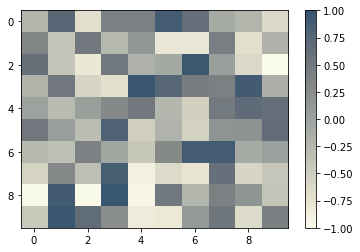

In [3]:
plot_cmap(LinearSegmentedColormap.from_list('MyColorMap', colors, N=265, gamma=1))

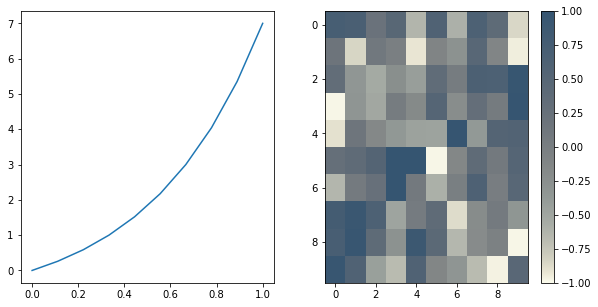

In [4]:
r = 3
f  = lambda x: np.exp(x*np.log(2)*r) - 1
fn = lambda x: f(x)/f(1)

# values still need to be in [0,1]
value_color_list = [(fn(i/(len(colors)-1)), c) for i,c in enumerate(colors)]

cmap = LinearSegmentedColormap.from_list('MyColorMap', value_color_list, N=265, gamma=1)

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(np.linspace(0, 1, 10), f(np.linspace(0, 1, 10)))
plot_cmap(cmap, ax[1])

## Color Search Engine
[picular.com](https://picular.co/)

![title](./tea_and_coffee.png)

In [5]:
stops = np.array([0, .5, 1])

                   # R ,  G ,  B,   A
colors = np.array([[130, 220,  51, 255],  # 0  - tea leaf
                   [210, 210, 210, 100],  # .5 - neutral 
                   [181, 133, 100, 255]]) # 1  - coffee bean

colors = colors / 255
colorstops = np.c_[stops, colors]

cdict = {'red'  : colorstops[:, [0,1,1]],
         'green': colorstops[:, [0,2,2]],
         'blue' : colorstops[:, [0,3,3]],
         'alpha': colorstops[:, [0,4,4]]}

cmap = LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['r', 'g', 'b', 'k'])

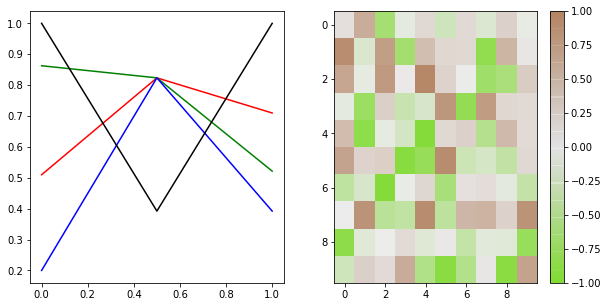

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

ax[0].plot(stops, colorstops[:, 1:])
plot_cmap(cmap, ax[1])